In [ ]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.constraints import maxnorm
from keras.optimizers import SGD
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=200, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

D:\ananonda\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
D:\ananonda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
D:\ananonda\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
 - 29s - loss: 0.9373 - accuracy: 0.6809 - val_loss: 0.1545 - val_accuracy: 0.9551
Epoch 2/200
 - 27s - loss: 0.3173 - accuracy: 0.9085 - val_loss: 0.0897 - val_accuracy: 0.9731
Epoch 3/200
 - 28s - loss: 0.2417 - accuracy: 0.9322 - val_loss: 0.0718 - val_accuracy: 0.9775
Epoch 4/200
 - 28s - loss: 0.1967 - accuracy: 0.9449 - val_loss: 0.0614 - val_accuracy: 0.9813
Epoch 5/200
 - 27s - loss: 0.1794 - accuracy: 0.9517 - val_loss: 0.0521 - val_accuracy: 0.9843
Epoch 6/200
 - 27s - loss: 0.1592 - accuracy: 0.9566 - val_loss: 0.0490 - val_accuracy: 0.9841
Epoch 7/200
 - 28s - loss: 0.1449 - accuracy: 0.9595 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 8/200
 - 27s - loss: 0.1353 - accuracy: 0.9639 - val_loss: 0.0420 - val_accuracy: 0.9879
Epoch 9/200
 - 27s - loss: 0.1254 - accuracy: 0.9655 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 10/200
 - 29s - loss: 0.1206 - accuracy: 0.9675 - val_loss: 0.0391 - val_accuracy: 0.989

In [3]:
network.save('m_lenet.h5')

输入数字：
识别为：
[2]


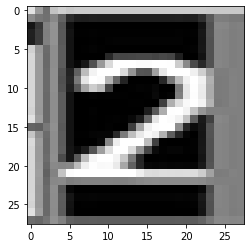

In [15]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

model = load_model('m_lenet.h5')

def pre_pic(picName):
    # 先打开传入的原始图片
    img = Image.open(picName)
    # 使用消除锯齿的方法resize图片
    reIm = img.resize((28,28),Image.ANTIALIAS)
    # 变成灰度图，转换成矩阵
    im_arr = np.array(reIm.convert("L"))
    return im_arr

im1 = pre_pic('2.png')
print('输入数字：')

plt.imshow(im1,cmap=plt.get_cmap('gray'))
plt.show

im1 = im1.reshape((1,28*28))
im1 = im1.astype('float32')/255

predict = model.predict_classes(im1)
print ('识别为：')
print (predict)
